<a href="https://colab.research.google.com/github/allefbcc/cienciaDeDados/blob/main/%5BPET%5D%202%C2%B0%20Fase/%5BPET%5D_%C3%81llef_Robson_Atividade_04_2%C2%B0_Fase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparações Iniciais

In [ ]:
!pip install mlforecast

In [ ]:
!pip install statsforecast

In [ ]:
import pandas as pd
from mlforecast import MLForecast

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as MSE
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error as MAPE


from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, Naive



In [ ]:
path = 'https://raw.githubusercontent.com/allefbcc/cienciaDeDados/main/Gold%20Price.csv'
dados = pd.read_csv(path)

In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])

In [ ]:
dados.info()

In [ ]:
dados = dados.set_index('Date')

In [ ]:
dados

### Ajustando o formato dataframe para ser utilizado no NIXTLA

In [ ]:
df_nixtla = pd.DataFrame(
    {
        'unique_id' : 'preco',
        'ds' : dados.index,
        'y' : dados.Price.values

    }
)

In [ ]:
df_nixtla.info()

In [ ]:
df_nixtla

### Dividindo em Treinamento e Teste

In [ ]:
test = df_nixtla.tail(365)
train = df_nixtla.drop(test.index)

In [ ]:
train

### Usando MLForecast

In [ ]:
fcst = MLForecast(
    models=[KNeighborsRegressor(), DecisionTreeRegressor()],
    freq='D',
    lags=[i for i in range(1, 2)]
)

In [ ]:
fcst.fit(train)

MLForecast(models=[KNeighborsRegressor, DecisionTreeRegressor], freq=D, lag_features=['lag1'], date_features=[], num_threads=1)

In [ ]:
predict_full = fcst.predict(365)

In [ ]:
series = []
for unique_id in predict_full['unique_id'].unique():
  serie = predict_full.query("unique_id == @unique_id ")[['KNeighborsRegressor', 'DecisionTreeRegressor']]
  series.append(serie)

In [ ]:
df_result = series[0]
df_result['target'] = test['y'].values[0:365]

<Axes: >

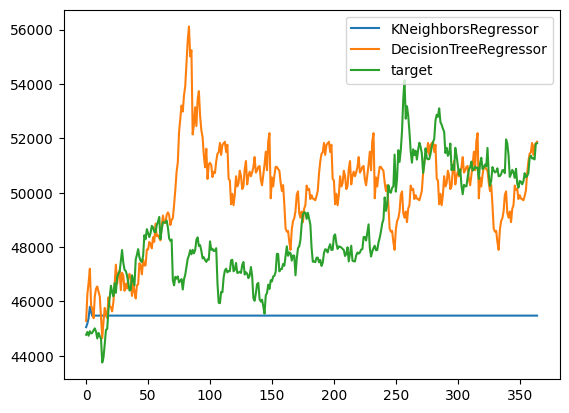

In [ ]:
df_result.plot()

In [ ]:
MAPE(df_result['target'], df_result['DecisionTreeRegressor'])

0.043889126872095216

In [ ]:
MAPE(df_result['target'], df_result['KNeighborsRegressor'])

0.06516974401772262

#### StatsForecast

In [ ]:
sf = StatsForecast(
    models = [AutoARIMA(season_length = 12), Naive()],
    freq = 'D'
)

In [ ]:
sf.fit(train)

StatsForecast(models=[AutoARIMA,Naive])

In [ ]:
predict_full_2 = sf.predict(365)

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
predict_full_2 = predict_full_2.reset_index()

In [ ]:
series_2 = []
for unique_id in predict_full_2['unique_id'].unique():
  serie_2 = predict_full_2.query("unique_id == @unique_id ")[['AutoARIMA', 'Naive']]
  series_2.append(serie_2)



In [ ]:
df_result_2 = series_2[0]
df_result_2['target'] = test['y'].values[0:365]

<Axes: >

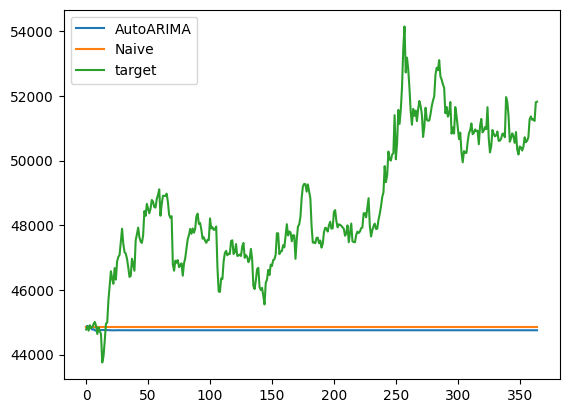

In [ ]:
df_result_2.plot()